In [1]:
import math
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(X):
    return 3 * X ** 2 - 4 * X + 5

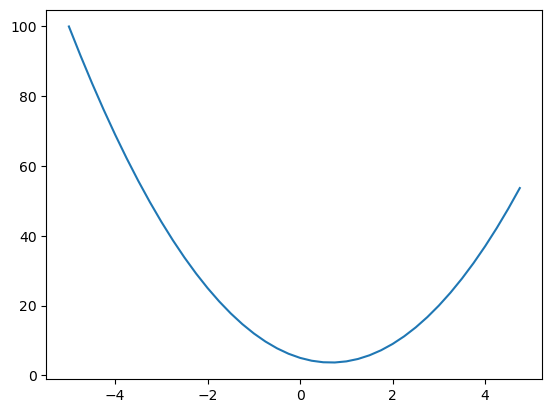

In [3]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)
plt.show()

In [4]:
h = 0.000001
x = 2 / 3
(f(x + h) - f(x)) / h

2.999378523327323e-06

In [5]:
a = 2.0
b = -3.0
c = 10.0
d = a * b + c
print(d)

4.0


In [6]:
h = 0.0001

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a * b + c
c += h
d2 = a * b + c

print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1) / h)

d1 4.0
d2 4.0001
slope 0.9999999999976694


In [ ]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self.grad = 0.0
        self._backward = lambda: None
 
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad = 1.0 * out.grad
            other.grad = 1.0 * out.grad

        out._backward = _backward
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad = other.data * out.grad
            

        out._backward = _backward()

        return out
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')
        return out
    

    
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a * b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label='L'
L

Value(data=-8.0)

In [8]:
d._op

'+'

In [19]:
L.grad = 1.0

In [10]:
from graphviz import Digraph

# Enumerates all the nodes and edges -> builds a set for them
def trace(root):
    # builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

# Draw the graph
def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
        if n._op:
          # if this value is a result of some operation, create an op node for it
          dot.node(name = uid + n._op, label = n._op)
          # and connect this node to it
          dot.edge(uid + n._op, uid)

    for n1, n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot


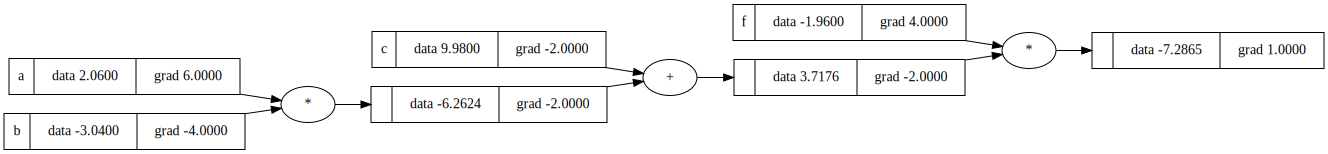

In [23]:
draw_dot(L)

### Chain Rule in Calculus

- If you want to find $\frac{\partial L}{\partial c}$, then according to the chain rule:

  $\frac{\partial L}{\partial c} = \frac{\partial L}{\partial d} \cdot \frac{\partial d}{\partial c}$

- For example, if variable $z$ (or $L$) depends on $y$ (or $d$), which in turn depends on $x$ (or $c$), then $z$ indirectly depends on $x$ through this chain of dependencies

- If car travel twice as fast a bicycle and the bicycle is four times as fast as a walking man, then the car travels 2 * 4 = 8 times as fast as the man

### Chain Rule Example with Speeds

Let's analyze this using variables and the chain rule:

- Let's define:
  - $m$ = man's speed (walking)
  - $b$ = bicycle speed
  - $c$ = car speed

Given:
- $\frac{\partial c}{\partial b} = 2$ (car is twice as fast as bicycle)

- $\frac{\partial b}{\partial m} = 4$ (bicycle is four times as fast as walking)

Therefore:
- $\frac{\partial c}{\partial m} = \frac{\partial c}{\partial b} \cdot \frac{\partial b}{\partial m} = 2 \cdot 4 = 8$

This means:
- When man's speed ($m$) is 1 unit: car speed = 8 units
- When man's speed ($m$) is 2 units: car speed = 16 units

### Derivative Calculation Example

Given:
- $\frac{\partial d}{\partial c} = 1.0$ (from $d = c + e$)

- $\frac{\partial d}{\partial e} = 1.0$ (from $d = c + e$)

- $d = c + e$ (the original equation)

Want to find:
- $\frac{\partial L}{\partial c} = \frac{\partial L}{\partial d} \cdot \frac{\partial d}{\partial c}$

Known values:
- $\frac{\partial L}{\partial d} = -2.0$

- $\frac{\partial d}{\partial c} = 1.0$  (why 1? change in c reflects as it is in d)

Therefore:
$\frac{\partial L}{\partial c} = (-2.0) \cdot (1.0) = -2.0$

This explains why `c.grad` equals `-2.0`

- Explaination by AI
### Understanding the Derivatives

1. The derivative $\frac{\partial d}{\partial c} = 1.0$ is correct because:
   - In the equation $d = c + e$
   - When $c$ changes by some amount, $d$ changes by exactly that same amount
   - This 1-to-1 relationship means the derivative is 1.0

2. Your chain rule application is correct:
   - $\frac{\partial L}{\partial c} = \frac{\partial L}{\partial d} \cdot \frac{\partial d}{\partial c}$
   - $= (-2.0) \cdot (1.0)$
   - $= -2.0$

3. The comment "(why 1? change in c reflects as it is in d)" is also a good intuitive explanation:
   - If $c$ increases by 2, then $d$ increases by 2
   - If $c$ decreases by 3, then $d$ decreases by 3
   - This direct relationship is why $\frac{\partial d}{\partial c} = 1.0$

In [27]:
f.grad = 4.0
d.grad = -2.0

c.grad = -2.0
e.grad = -2.0

a.grad = -2.0 * -3.0 # de/da is value of b
b.grad = -2.0 * 2.0 # de/db is value of a

### Chain Rule Application

Given:
- $e = a \cdot b$ (the original equation)
- $\frac{\partial L}{\partial e} = -2.0$ (known value)
- $\frac{\partial e}{\partial a} = b$ (because $e = a \cdot b$)

Want to find:
- $\frac{\partial L}{\partial a} = \frac{\partial L}{\partial e} \cdot \frac{\partial e}{\partial a}$

Therefore:
$\frac{\partial L}{\partial a} = (-2.0) \cdot (b)$

Note:
- $\frac{\partial e}{\partial a} = b$ because when we differentiate $e = a \cdot b$ with respect to $a$, we treat $b$ as a constant
- The final value will depend on what $b$ is in your calculation
- For example, if $b = 3$, then $\frac{\partial L}{\partial a} = (-2.0) \cdot (3) = -6.0$

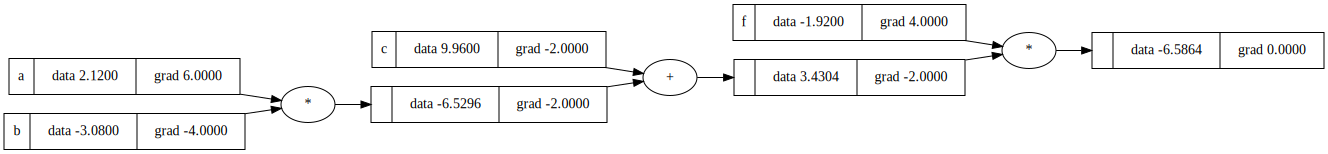

In [28]:
draw_dot(L)

In [24]:
a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad


e = a * b
d = e + c
L = d * f

print(L.data)


-6.586368000000001


In [25]:
def lol():
    h = 0.001

    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a * b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; L.label='L'
    L1 = L.data

    a = Value(2.0, label='a')
    # a.data += h  # as we mentioned about a.grad=6.0
    b = Value(-3.0, label='b')
    # b.data += h  # as we mentioned about b.grad=-4.0
    c = Value(10.0, label='c')
    # c.data += h  # as we mentioned about c.grad=-2.0
    e = a * b; e.label = 'e'
    # e.data += h #  as we mentioned about e.grad=-2.0
    d = e + c; d.label = 'd'
    # d.data += h # as we mentioned about d.grad=-2.0
    f = Value(-2.0, label='f')
    # f.data += h # as we mentioned about f.grad=4.0
    L = d * f; L.label='L'
    L2 = L.data

    print((L2 - L1)/h)
    
lol()

0.0


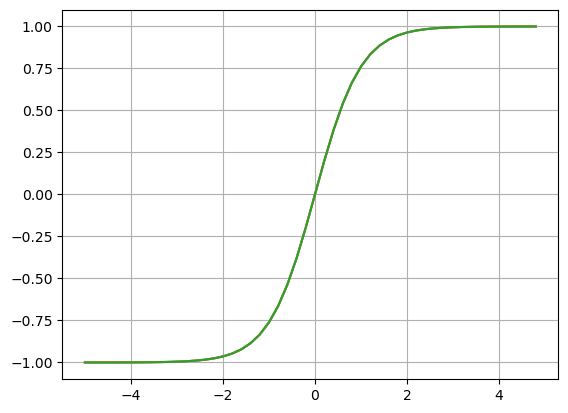

In [30]:
plt.plot(np.arange(-5, 5, 0.2), np.tanh(np.arange(-5, 5, 0.2))); plt.grid(); plt.show()

In [43]:
# Inputs x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# Weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# Bias b
# Making sure backprop numbers come out nice later on
b = Value(6.8813735870195432, label='b')

# Neuron value n: x1w1+x2w2 + b
x1w1 = x1*w1; x1w1.label='x1*w1'
x2w2 = x2*w2; x2w2.label='x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label='x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label='n'

o = n.tanh(); o.label='o'

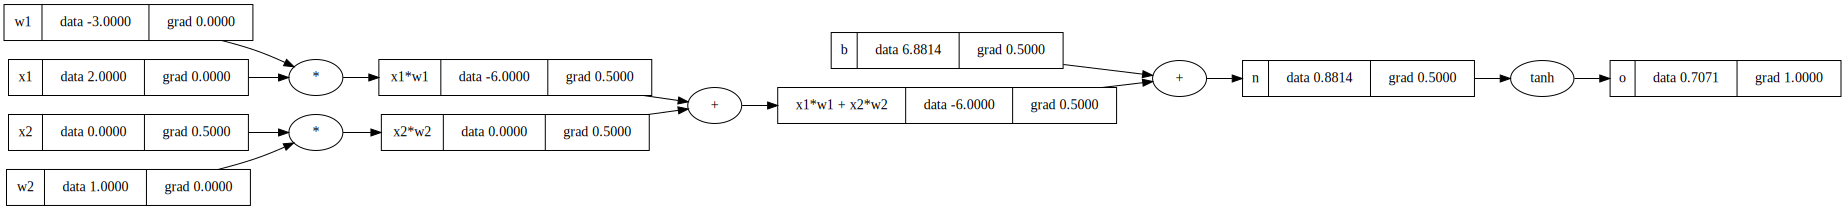

In [62]:
draw_dot(o)

In [59]:
x1w1.grad = 0.5
x2w2.grad = 0.5

In [55]:
# x1w1x2w2.grad = n.grad
# b.grad = n.grad

x1w1x2w2.grad = 0.5
b.grad = 0.5

In [53]:
o.grad = 1

In [52]:
# o = tanh(n)
# do/dn = 1 - tanh(n)**2
1 - o.data ** 2   # 0.4999999999999999


n.grad = 0.5

In [61]:
x2.grad = w2.data * x2w2.grad
w2.grad = x2.data * x2w2.grad

In [63]:
x1.grad = w1.data * x1w1.grad
w1.grad = x1.data * x1w1.grad

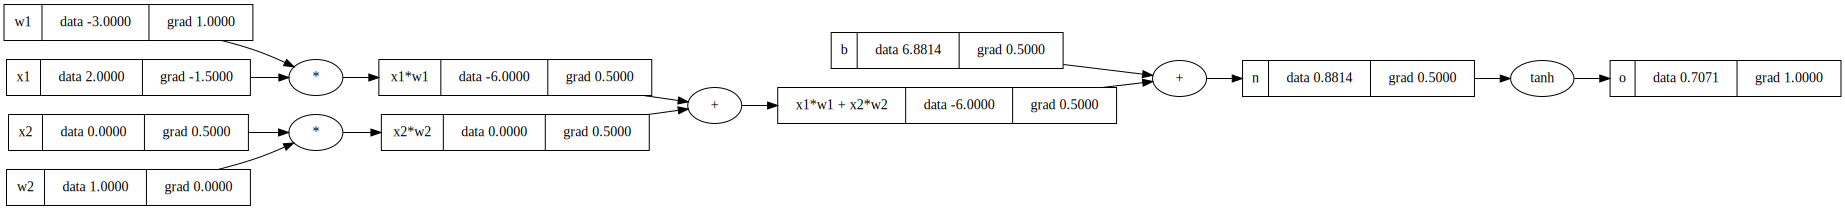

In [64]:
draw_dot(o)